## Iris Flower Classification
#### The goal of this simple project is to classify the various categories of Iris flowers based on their sepals and petals length and width.
#### The project using basic statisticla functions to see how the data is and its discription and also a few exploratory techniques like box plots, pair plots and histograms to see the univariate and multivariate distribution of the data visually.
#### We are using the correlation to find the strength of the relationship between the sepals and petals length and width and also plotting a heatmap for the same.
#### We are using various Machine Learning algorithms to see how they fit into the data and also analyze the kind of results they produce pertaining to the algorithms and also how they are related to a particular folower type.

In [50]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn import linear_model

In [51]:
# Load dataset
fields = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
df = pd.read_csv("IRIS.csv", sep=",")

In [77]:
df.shape#To show the Number of Rows and columns

(150, 5)

In [78]:
df.head()#To display the first 5 rows of data just to see if the data set is right or not

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.describe()#To display certain basic statistical properties with respect to the data set

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
df.tail()#To display the last 5 rows


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [81]:
df.head(20)#To display the first 20 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [82]:
print(df.groupby('species').size())#Group the number of differnt kind of flower species based on number

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


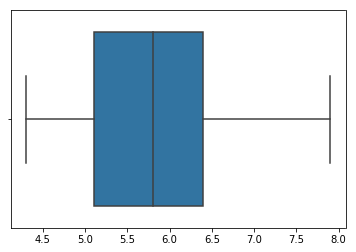

In [83]:
sns.boxplot(np.array(df['sepal_length']))#Box plot to chek the outliers-if any with respect to the median

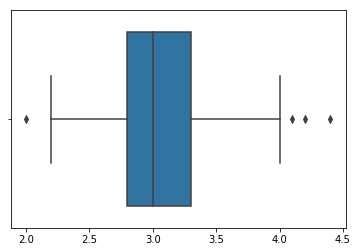

In [59]:
sns.boxplot(np.array(df['sepal_width']))

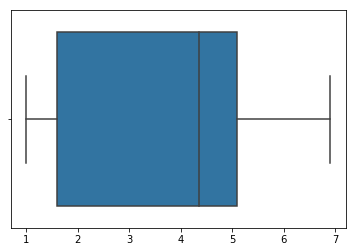

In [60]:
sns.boxplot(np.array(df['petal_length']))

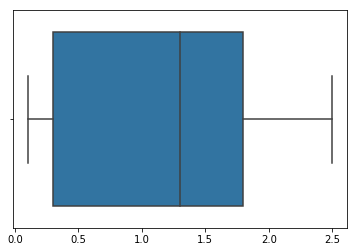

In [61]:
sns.boxplot(np.array(df['petal_width']))

In [84]:
df.corr()#Correlation to find strength of the relationship among the different fields

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


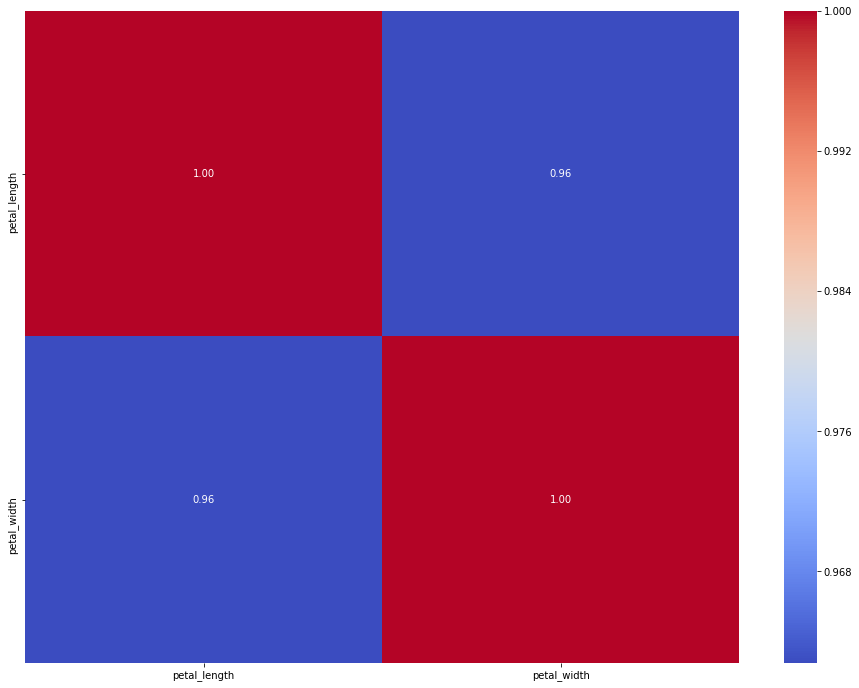

In [85]:
#Heat map to find the mapping of different correlation values with the fields of the data set
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

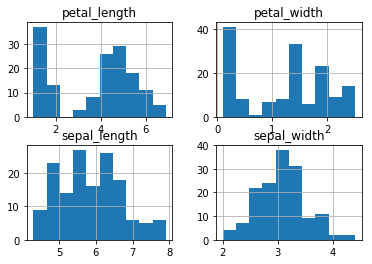

In [86]:
# MULTIVARIATE PLOTS
# histograms
df.hist()
plt.show()

In [65]:
x = df[['petal_length','petal_width','sepal_length','sepal_width']]

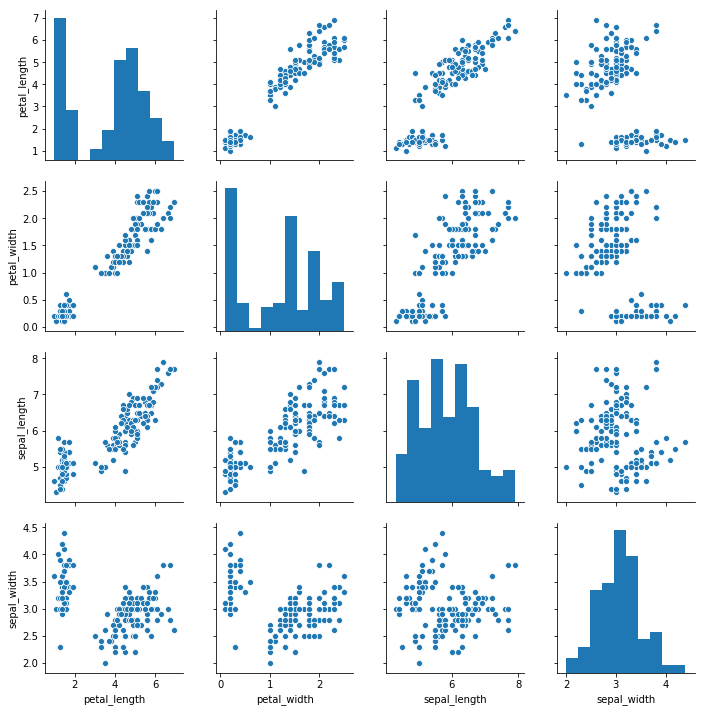

In [87]:
sns.pairplot(x)#Multivariate plot like a scatterplot(pairplot)
plt.show()

In [101]:
# Split-out validation dataset
#Split the data set into the train and validation data that is a part of the data set is considered to be train data to model the algorithm and part as validation(20%) to tune the models of the Machine Learning algorithms
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [89]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [102]:
#Check Algorithms for their accuracy in predicting the results
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))#Linear classification technique usually for binary classification but can be extended to multi class classification as well but not preferred
models.append(('LDA', LinearDiscriminantAnalysis()))#Linear classification
models.append(('KNN', KNeighborsClassifier()))#Non linear Classification
models.append(('CART', DecisionTreeClassifier()))#Non Linear Classification
models.append(('NB', GaussianNB()))#Non Linear classification
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)


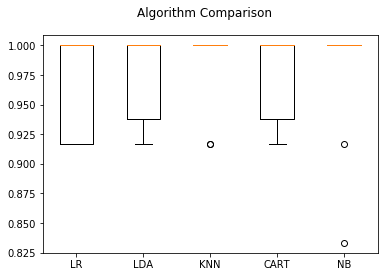

In [104]:
# Compare Algorithms based on the Whisker plots which shows the algorithms and the accuracy they have in classifying the actual type of Iris flower correctly based on the data provided
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [92]:
# Make predictions on validation dataset-Here the KNN algorthm is chosen because it has the highest accuracy among the total results produced by all the models
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



#### From the above analysis of the KNN algorithm we realize that the KNN has 100% precision in predicting the right type of classification for the Iris-setosa(based on F1 and precision) and 85 and 88% accuracy in predicting the Iris-versicolor and 90% and 86% accuracy in predicting the Iris-virginica based on the analysis table.

#### We also realize that the algorithm has 100% accuracy in predicitng Iris-setosa , 88% in Iris-versicolor and 86% accuracy in Iris-virginica based on the Recall data of a flower sample when a flower is chosen at random from the validation data.

### Hence from this simple analysis we can come to know the various classification of the Iris flowers and also the different linear and non linear model algorithms that are used to arrive at the conclusions based on their values.

# Fin.